#MS5114 Group Assignment

**# Group No 7**

The analysis aims to predict electricity consumption based on weather conditions. The timeframe used for analysis is from 2015 to 2020.

In [19]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Check if the directory exists before changing to it
dir_path = '/content/drive/My Drive/Assignment_2_dataset'
if os.path.exists(dir_path):
    os.chdir(dir_path)
    print("Current Directory: ", os.getcwd())
else:
    print(f"Error: Directory '{dir_path}' not found. Please create it in your Google Drive.")

Mounted at /content/drive
Current Directory:  /content/drive/My Drive/Assignment_2_dataset


# Business Use Case: Energy Demand Forecasting in Ireland

In the context of increasing energy demands and climate variability, accurate forecasting of electricity load is vital for grid stability and cost efficiency . This project focuses on analyzing weather-related features (such as rainfall, wind speed, wind direction, and date) to understand and predict electricity demand patterns in Ireland.

We use a weather-based dataset — inspired by data sources such as Weather Hourly data, station data and Electricity Consumption data  — to create a machine learning pipeline that:

Clusters daily weather regional conditions to discover weather data .

Classifies the electricity load into categories (Low, Medium, High) for better forecasting using the above clusters.

By applying clustering and multiclass classification models, we aim to generate actionable insights that could help energy providers and policymakers manage electricity supply and demand efficiently.

Data Set Links: <br>
Weather Hourly data: https://www.kaggle.com/datasets/dariasvasileva/hourly-weather-data-in-ireland-from-24-stations?select=aggregated_hourly_data.csv <br>
Station data: https://www.kaggle.com/datasets/dariasvasileva/hourly-weather-data-in-ireland-from-24-stations?select=station_list.csv <br>
Electricity Consumption:  https://www.kaggle.com/datasets/francoisraucent/western-europe-power-consumption?select=ie.csv

# Summary of Datasets

**Description**

*Dataset-1*: Weather Data (Hourly Observations from 24 Stations in Ireland)

| **Variable** | **Description** | **Possible Values & Meaning** |
|--------------|-----------------|-------------------------------|
| **date**     | Date and Time of observation | Datetime format (e.g., YYYY-MM-DD HH:MM:SS) |
| **ind**      | Encoded Rainfall Indicators | 0: Satisfactory<br>1: Deposition<br>2: Trace or sum of precipitation<br>3: Trace or sum of deposition<br>4: Estimated precipitation<br>5: Estimated deposition<br>6: Estimated trace of precipitation |
| **rain**     | Precipitation Amount | Measured in millimeters (mm) |
| **ind.1**   | Encoded Temperature Indicators | 0: Positive<br>1: Negative<br>2: Positive estimated<br>3: Negative estimated<br>4: Not available |
| **temp**     | Air Temperature | Measured in °C (Celsius) |
| **ind.2**   | Encoded Wet Bulb Indicators | 0: Positive<br>1: Negative<br>2: Positive estimated<br>3: Negative estimated<br>4: Not available<br>5: Frozen negative |
| **wetb**     | Wet Bulb Air Temperature | Measured in °C (Celsius) |
| **dewpt**    | Dew Point Air Temperature | Measured in °C (Celsius) |
| **vappr**    | Vapour Pressure | Measured in hPa |
| **rhum**     | Relative Humidity | Percentage (%) |
| **msl**      | Mean Sea Level Pressure | Measured in hPa |
| **ind.3**   | Encoded Wind Speed Indicators | 2: Over 60 minutes<br>4: Over 60 minutes and defective<br>6: Over 60 minutes and partially defective<br>7: N/A |
| **wdsp**     | Mean Hourly Wind Speed | Measured in knots |
| **ind.4**   | Encoded Wind Direction Indicators | 2: Over 60 minutes<br>4: Over 60 minutes and defective<br>6: Over 60 minutes and partially defective<br>7: N/A |
| **wddir**    | Predominant Hourly Wind Direction | Measured in degrees |
| **WW**       | Encoded Weather Conditions | Numeric codes (00–99) representing various conditions:<br>• 00–19: No precipitation, fog, duststorm, sandstorm, drifting/blowing snow (e.g., 00: Cloud development not observed, 10: Mist, 17: Thunderstorm without precipitation, etc.)<br>• 20–29: Precipitation, fog, ice fog, or thunderstorm (e.g., 20: Drizzle or snow grains, 25: Shower(s) of rain, 29: Thunderstorm with/without precipitation)<br>• 30–39: Duststorm, sandstorm, drifting or blowing snow<br>• 40–49: Fog or ice fog at time of observation<br>• 50–59: Drizzle (various intensities and types)<br>• 60–69: Rain (intermittent or continuous, various intensities)<br>• 70–79: Solid precipitation not in showers (e.g., snowflakes, ice pellets)<br>• 80–99: Showery precipitation or thunderstorms (various intensities) |
| **w**        | Synop Code Past Weather | 0: Cloud covering ≤1/2 of sky<br>1: Cloud covering more than 1/2 during part of period<br>2: Cloud covering >1/2 of sky throughout<br>3: Sandstorm, duststorm or blowing snow<br>4: Fog or ice fog or thick haze<br>5: Drizzle<br>6: Rain<br>7: Snow or rain and snow mixed<br>8: Shower(s)<br>9: Thunderstorm(s) with or without precipitation |
| **sun**      | Sunshine Duration | Measured in hours |
| **vis**      | Visibility | Measured in meters (m) |
| **clht**     | Cloud Ceiling Height | Measured in 100s of feet (999 indicates no value) |
| **clamt**    | Cloud Amount | Measured in okta (eighths of the sky) |

*Dataset-2* - The dataset has information related about the each station in terms of location name, id , name with geographical corrodinates.**

| **Variable**  | **Description**                                          | **Example**                      |
|--------------|------------------------------------------------------|--------------------------------|
| **county**   | County where the station is located                | Galway, Dublin, Cork         |
| **st_id**    | Station number                                      | 12345, 67890, 54321          |
| **st_name**  | Station name                                        | Mace Head, Phoenix Park, Cork Airport |
| **st_height**| Station height in meters                           | 10.5, 15.2, 8.7              |
| **st_lat**   | Station latitude (DMS notation)                    | 53°19'30"N, 52°15'45"N       |
| **st_long**  | Station longitude (DMS notation)                   | 9°54'30"W, 6°21'15"W         |


*Dataset-3* - The dataset contains electricity consumption of ireland in megawatts for the five years.

| **Variable**  | **Description**                                      | **Example**                      |
|---------------|------------------------------------------------------|----------------------------------|
| **start time**| Start time of the data record                        | 2020-01-01 00:00:00             |
| **end time**  | End time of the data record                          | 2020-01-01 01:00:00             |
| **load**      | Power consumption in Megawatts (MW)                  | 1500 MW, 1200 MW, 1750 MW       |


## Data Loading and Preprocessing for Clustering Analysis

**Importing necessary libraries for data manipulation, visualization, and machine learning.**

Loading three datasets:

1. Electricity consumption data (ie.csv) – Contains information on electricity usage.

2. Weather data (aggregated_hourly_data.csv) – Includes hourly weather conditions.

3. Station data (station_list.csv) – Provides details about weather stations.**

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (silhouette_score,classification_report, confusion_matrix)
import joblib

## load the csv files on python environment using pandas library

ele_cons_data = pd.read_csv("ie.csv")
weather_data = pd.read_csv("aggregated_hourly_data.csv")
station_data = pd.read_csv("station_list.csv")

**These steps provide an initial exploration of the datasets before applying further preprocessing and machine learning techniques.**

In [21]:
# Getting summary of Electricity Consumption Data
print(f'Electricity Consumption Data(every 30 min): {ele_cons_data.columns} and number of records {ele_cons_data.shape}')
print(ele_cons_data.head(5))
print(ele_cons_data.describe())

Electricity Consumption Data(every 30 min): Index(['start', 'end', 'load'], dtype='object') and number of records (97148, 3)
                       start                        end    load
0  2015-01-01 00:00:00+00:00  2015-01-01 00:30:00+00:00  2903.0
1  2015-01-01 00:30:00+00:00  2015-01-01 01:00:00+00:00  2832.0
2  2015-01-01 01:00:00+00:00  2015-01-01 01:30:00+00:00  2726.0
3  2015-01-01 01:30:00+00:00  2015-01-01 02:00:00+00:00  2630.0
4  2015-01-01 02:00:00+00:00  2015-01-01 02:30:00+00:00  2488.0
               load
count  97148.000000
mean    3190.662783
std      612.120301
min     1766.000000
25%     2685.000000
50%     3251.000000
75%     3635.000000
max     5024.000000


In [22]:
# Getting summary of Weather Data
print(f'Weather Data(every 1 hr): {weather_data.columns} and number of records {weather_data.shape}')
print(weather_data.head(5))
print(weather_data.describe())


Weather Data(every 1 hr): Index(['Unnamed: 0', 'date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir',
       'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'county', 'st_id', 'st_name',
       'st_height', 'st_lat', 'st_long'],
      dtype='object') and number of records (2736255, 28)
   Unnamed: 0                 date  ind  rain  ind.1  temp  ind.2  wetb  \
0           0  2007-12-31 02:00:00  0.0   0.0    0.0   9.2    0.0   8.0   
1           1  2007-12-31 03:00:00  0.0   0.0    0.0   9.3    0.0   7.8   
2           2  2007-12-31 04:00:00  0.0   0.0    0.0   9.3    0.0   7.7   
3           3  2007-12-31 05:00:00  0.0   0.0    0.0   9.6    0.0   8.3   
4           4  2007-12-31 06:00:00  0.0   0.0    0.0   9.8    0.0   8.5   

   dewpt  vappr  ...  sun  vis  clht  clamt  county  st_id       st_name  \
0    6.6    9.8  ...  NaN  NaN   NaN    NaN  Dublin  175.0  phoenix_park   
1    5.9    9.3  ...  NaN  NaN   NaN   

In [23]:
# Getting summary of Station Data
print(f'Station Data: {station_data.columns} and number of records {station_data.shape}')
print(station_data.head(5))
print(station_data.describe())

Station Data: Index(['Unnamed: 0', 'County', 'Station ID', 'Station name', 'Height',
       'Easting', 'Northing', 'Latitude', 'Longitude'],
      dtype='object') and number of records (24, 9)
   Unnamed: 0  County  Station ID     Station name  Height  Easting  Northing  \
0           0  Dublin         175     phoenix_park      48   309915    236070   
1           1  Galway         275        mace_head      21    73400    232276   
2           2  Carlow         375         oak_park      62   273000    179500   
3           3   Clare         518  shannon_airport      15   137900    160300   
4           4  Dublin         532   dublin_airport      71   316900    243400   

   Latitude  Longitude  
0    532149      62059  
1    531933      95403  
2    525140      65455  
3    524125      85505  
4    532540      61427  
       Unnamed: 0   Station ID      Height        Easting       Northing  \
count   24.000000    24.000000   24.000000      24.000000      24.000000   
mean    11.500000 

## Merging and Cleaning Weather and Station Data

**This step ensures that the weather dataset is clean, concise, and ready for further analysis by eliminating redundant station details while preserving crucial weather attributes.**

In [24]:
#Merging of Station data and Weather Data
weather_data_1=pd.merge(weather_data,station_data,left_on='st_id',right_on='Station ID',how='inner' )
print(f'Weather Data(every 1 hr): {weather_data_1.columns} and number of records {weather_data_1.shape}',end='\n\n')

print("After merging and dropping duplicate columns", end='\n\n')

weather_data_2=weather_data_1.drop(['Station ID','Station name','st_height', 'st_lat', 'st_long','Unnamed: 0_y'],axis=1)
print(f'Weather Data(every 1 hr): {weather_data_2.columns} and number of records {weather_data_2.shape}')

Weather Data(every 1 hr): Index(['Unnamed: 0_x', 'date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir',
       'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'county', 'st_id', 'st_name',
       'st_height', 'st_lat', 'st_long', 'Unnamed: 0_y', 'County',
       'Station ID', 'Station name', 'Height', 'Easting', 'Northing',
       'Latitude', 'Longitude'],
      dtype='object') and number of records (2736254, 37)

After merging and dropping duplicate columns

Weather Data(every 1 hr): Index(['Unnamed: 0_x', 'date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir',
       'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'county', 'st_id', 'st_name',
       'County', 'Height', 'Easting', 'Northing', 'Latitude', 'Longitude'],
      dtype='object') and number of records (2736254, 31)


## Filtering Weather Data for a Specific Time Period

**This section of the code extracts weather data within a specified date range (January 1, 2015, to July 28, 2020). Also, removes unnecessary data outside the specified range, making the dataset more relevant for analysis.Improves computational efficiency by reducing the dataset size before applying machine learning techniques.**

In [25]:
#fetching data from (2015-01-01 - 2020-07-28)

# Ensure 'date' column is in datetime format
weather_data_2['date'] = pd.to_datetime(weather_data_2['date'])

# Filter records from (2015-01-01 - 2020-07-28)
weather_data_filtered = weather_data_2[(weather_data_2['date'] >= '2015-01-01') & (weather_data_2['date'] <= '2020-07-28')]

print(f'Weather data before filtering: {weather_data.shape[0]}, Weather data after filtering : {weather_data_filtered.shape[0]}')

Weather data before filtering: 2736255, Weather data after filtering : 1074502


## Checking Null Values
This section defines a function to detect and handle missing values in the electricity consumption and weather datasets. It replaces empty strings with NaN, counts null values, and applies a threshold-based cleaning approach.Ensuring data quality by removing inconsistencies and handling missing values efficiently.It maintains a balance between data retention and cleanliness, keeping only meaningful records.It prepares datasets for further machine learning tasks, such as clustering and predictive modeling.

In [26]:
# Replace empty strings with NaN and count null values for each DataFrame
def null_value_check(df):
  df=df.replace("", pd.NA)
  null_chk=0
  for columns, misscnt in df.isnull().sum().items():
    if misscnt!=0:
      if misscnt <=500:
        # print(f"{columns} had <500 null values. Hence, dropping the records")
        df=df.dropna(subset=[columns]) # dropping null records if the number of null records are less than 500(as we have a quite a large number of records) in a column
      elif misscnt >=500:
        print(f'{columns}: Null Values={misscnt}')
        null_chk=null_chk+1
  if null_chk==0:
      print('No Null Values')
  return df

print("Blank or NaN values count in ele_cons_data:")
ele_cons_data_1=null_value_check(ele_cons_data)

print("\nBlank or NaN values count in weather_data:")
weather_data_filtered_1=null_value_check(weather_data_filtered)

Blank or NaN values count in ele_cons_data:
No Null Values

Blank or NaN values count in weather_data:
ind.3: Null Values=97682
wdsp: Null Values=97870
ind.4: Null Values=97682
wddir: Null Values=97948
ww: Null Values=927979
w: Null Values=927979
sun: Null Values=927979
vis: Null Values=927979
clht: Null Values=927979
clamt: Null Values=927979


This section of the code:

1. Compares the dataset sizes before and after removing missing values <br>
2. Updates the cleaned dataset <br>
3. Processes datetime information by extracting date, time, and hour <br>components

In [27]:
print(f'Before dropping null records from ele_cons_data: {ele_cons_data.shape} and after {ele_cons_data_1.shape}')
ele_cons_data=ele_cons_data_1

print(f'Before dropping null records from ele_cons_data: {weather_data_filtered.shape} and after {weather_data_filtered_1.shape}')
weather_data_filtered=weather_data_filtered_1

# Convert 'date' column in weather_data_2015
weather_data_filtered.loc[:, 'date'] = pd.to_datetime(weather_data_filtered['date'])

# Extract date and time separately
weather_data_filtered.loc[:, 'weather_date'] = weather_data_filtered['date'].dt.date
weather_data_filtered.loc[:, 'weather_time'] = weather_data_filtered['date'].dt.time
# Extract hour from the 'weather_time' column
weather_data_filtered.loc[:, 'Hour'] = weather_data_filtered['weather_time'].apply(lambda x: x.hour)

weather_data_filtered.head(5)

Before dropping null records from ele_cons_data: (97148, 3) and after (97148, 3)
Before dropping null records from ele_cons_data: (1074502, 31) and after (1074028, 31)


,Unnamed: 0_x,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,...,st_name,County,Height,Easting,Northing,Latitude,Longitude,weather_date,weather_time,Hour
61390,61390,2015-01-01 00:00:00,0.0,0.0,0.0,9.3,0.0,8.1,6.7,9.8,...,phoenix_park,Dublin,48,309915,236070,532149,62059,2015-01-01,00:00:00,0
61391,61391,2015-01-01 01:00:00,0.0,0.0,0.0,9.1,0.0,7.6,5.7,9.2,...,phoenix_park,Dublin,48,309915,236070,532149,62059,2015-01-01,01:00:00,1
61392,61392,2015-01-01 02:00:00,0.0,0.0,0.0,9.5,0.0,7.7,5.4,9.0,...,phoenix_park,Dublin,48,309915,236070,532149,62059,2015-01-01,02:00:00,2
61393,61393,2015-01-01 03:00:00,0.0,0.0,0.0,10.1,0.0,8.1,5.6,9.1,...,phoenix_park,Dublin,48,309915,236070,532149,62059,2015-01-01,03:00:00,3
61394,61394,2015-01-01 04:00:00,0.0,0.0,0.0,10.3,0.0,8.5,6.4,9.6,...,phoenix_park,Dublin,48,309915,236070,532149,62059,2015-01-01,04:00:00,4


## Summary of Data Cleaning Steps

This process ensures the weather dataset is cleaned and ready for analysis by handling missing values efficiently.Creates a copy of the original dataset to prevent unwanted modifications.Fills missing values in numerical columns (e.g., wind speed, sunshine duration) using the mean for consistency.Fills missing values in categorical columns (e.g., weather indicators) using the mode (most frequent value).Checks for remaining missing values to verify data completeness.Stored the cleaned dataset for further processing.

In [28]:
# Ensure weather_data_cleaned is a copy of the original dataframe
weather_data_cleaning = weather_data_filtered.copy()

# Wind speed - Fill using station-wise mean
weather_data_cleaning['wdsp']=weather_data_cleaning['wdsp'].fillna(weather_data_cleaning['wdsp'].mean())

# Wind direction - Fill using mean
weather_data_cleaning['wddir']=weather_data_cleaning['wddir'].fillna(weather_data_cleaning['wddir'].mean())

# Encode categorical indicators with mode (most common value)
weather_data_cleaning['ind.3']=weather_data_cleaning['ind.3'].fillna(weather_data_cleaning['ind.3'].mode()[0])
weather_data_cleaning['ind.4']=weather_data_cleaning['ind.4'].fillna(weather_data_cleaning['ind.4'].mode()[0])
weather_data_cleaning['w']=weather_data_cleaning['w'].fillna(weather_data_cleaning['w'].mode()[0])
weather_data_cleaning['ww']=weather_data_cleaning['ww'].fillna(weather_data_cleaning['ww'].mode()[0])

# Sunshine Duration, visibility, Cloud Ceiling Height,Cloud Amount - Fill using mean
weather_data_cleaning['sun']=weather_data_cleaning['sun'].fillna(weather_data_cleaning['sun'].mean())
weather_data_cleaning['vis']=weather_data_cleaning['vis'].fillna(weather_data_cleaning['vis'].mean())
weather_data_cleaning['clht']=weather_data_cleaning['clht'].fillna(weather_data_cleaning['clht'].mean())
weather_data_cleaning['clamt']=weather_data_cleaning['clamt'].fillna(weather_data_cleaning['clamt'].mean())

print(f'After Imputing, Weather data has {weather_data_cleaning.isnull().sum()}')  # Should show 0 or minimal missing values

weather_data_cleaned=weather_data_cleaning

After Imputing, Weather data has Unnamed: 0_x    0
date            0
ind             0
rain            0
ind.1           0
temp            0
ind.2           0
wetb            0
dewpt           0
vappr           0
rhum            0
msl             0
ind.3           0
wdsp            0
ind.4           0
wddir           0
ww              0
w               0
sun             0
vis             0
clht            0
clamt           0
county          0
st_id           0
st_name         0
County          0
Height          0
Easting         0
Northing        0
Latitude        0
Longitude       0
weather_date    0
weather_time    0
Hour            0
dtype: int64


## Aggregating Electricity Consumption Data to Hourly Level

The code block converts 30-minute interval data to hourly totals for easier analysis. Prepares the dataset for trend analysis, forecasting, and machine learning.Ensures time-based indexing for further time-series operations.

In [29]:
ele_cons_data_1=ele_cons_data.copy()
ele_cons_data_1["start"] = pd.to_datetime(ele_cons_data_1["start"])
ele_cons_data_1 = ele_cons_data_1.set_index("start")
ele_cons_data_hourly = ele_cons_data_1.resample("h").sum().reset_index()

print(ele_cons_data_hourly.shape)
ele_cons_data_hourly.head(5)

(48852, 3)


,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 00:30:00+00:002015-01-01 01:00:00+0...,5735.0
1,2015-01-01 01:00:00+00:00,2015-01-01 01:30:00+00:002015-01-01 02:00:00+0...,5356.0
2,2015-01-01 02:00:00+00:00,2015-01-01 02:30:00+00:002015-01-01 03:00:00+0...,4865.0
3,2015-01-01 03:00:00+00:00,2015-01-01 03:30:00+00:002015-01-01 04:00:00+0...,4552.0
4,2015-01-01 04:00:00+00:00,2015-01-01 04:30:00+00:002015-01-01 05:00:00+0...,4347.0


# Outlier Detection and Removal in Weather Data

This step is crucial to removes extreme outliers to ensure clean, reliable data for analysis or modeling by using 3 standard deviations rule for outlier detection, a widely accepted approach in statistics.

In [30]:
# Outlier detection conditions

def remove_outliers(df, columns):
  for column in columns:
    mean = df[column].mean()
    std_dev = df[column].std()

    # Define lower and upper bounds
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Filter out the outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df_cleaned

# Weather data outlier removal
weather_columns=['rain', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir','sun', 'vis', 'clht', 'clamt']

weather_data_regional= remove_outliers(weather_data_cleaned, weather_columns)

print(f'Weather Data(Regional) Outlier removal (Before:{weather_data_cleaned.shape}, After: {weather_data_regional.shape} )')
print(weather_data_regional.columns)

Weather Data(Regional) Outlier removal (Before:(1074028, 34), After: (1041701, 34) )
Index(['Unnamed: 0_x', 'date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir',
       'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'county', 'st_id', 'st_name',
       'County', 'Height', 'Easting', 'Northing', 'Latitude', 'Longitude',
       'weather_date', 'weather_time', 'Hour'],
      dtype='object')


## Grouping Weather Data by Date and Aggregating

The step is to group the dataset by date and calculates daily averages for numerical variables and modes for categorical variables.It converts the dataset from regional to national level, making it more suitable for trend analysis and forecasting. It ensuresE the dataset is aggregated by date while preserving both numerical and categorical information.

In [31]:
weather_data_national_1=weather_data_cleaned.copy()
print(weather_data_national_1.columns)

weather_data_national_1['date']=pd.to_datetime(weather_data_national_1['date'])
weather_data_national = weather_data_national_1.groupby('date').agg({
    'rain': 'mean',
    'temp': 'mean',
    'ind.2': 'mean',
    'wetb': 'mean',
    'dewpt': 'mean',
    'vappr': 'mean',
    'rhum': 'mean',
    'msl': 'mean',
    'wdsp': 'mean',
    'wddir': 'mean',
    'sun': 'mean',
    'vis': 'mean',
    'clht': 'mean',
    'clamt': 'mean',
    'ind': lambda x: x.mode()[0],
    'ind.1': lambda x: x.mode()[0],
    'ind.2': lambda x: x.mode()[0],
    'ind.3': lambda x: x.mode()[0],
    'ind.4': lambda x: x.mode()[0],
    'ww': lambda x: x.mode()[0],
    'w': lambda x: x.mode()[0]
}).reset_index()

weather_data_national.head(5)

Index(['Unnamed: 0_x', 'date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir',
       'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'county', 'st_id', 'st_name',
       'County', 'Height', 'Easting', 'Northing', 'Latitude', 'Longitude',
       'weather_date', 'weather_time', 'Hour'],
      dtype='object')


,date,rain,temp,ind.2,wetb,dewpt,vappr,rhum,msl,wdsp,...,sun,vis,clht,clamt,ind,ind.1,ind.3,ind.4,ww,w
0,2015-01-01 00:00:00,0.040909,9.563636,0.0,8.672727,7.663636,10.531818,87.818182,1019.968182,13.154020,...,0.143099,25917.584146,271.782067,5.825079,0.0,0.0,2.0,2.0,2.0,11.0
1,2015-01-01 01:00:00,0.000000,9.627273,0.0,8.659091,7.559091,10.468182,86.727273,1019.859091,12.926747,...,0.143099,25917.584146,270.418431,5.825079,0.0,0.0,2.0,2.0,2.0,11.0
2,2015-01-01 02:00:00,0.009091,9.800000,0.0,8.727273,7.509091,10.431818,85.454545,1019.213636,13.063111,...,0.143099,25917.584146,265.872977,5.825079,0.0,0.0,2.0,2.0,2.0,11.0
3,2015-01-01 03:00:00,0.022727,9.904545,0.0,8.818182,7.577273,10.495455,85.500000,1018.577273,13.381293,...,0.143099,25917.584146,268.145704,5.825079,0.0,0.0,2.0,2.0,2.0,11.0
4,2015-01-01 04:00:00,0.159091,9.936364,0.0,8.940909,7.845455,10.645455,86.590909,1017.472727,13.017656,...,0.143099,25917.584146,263.145704,5.825079,0.0,0.0,2.0,2.0,2.0,11.0


## Merging Weather Data with Electricity Consumption Data

The code section is to merge weather data and electricity consumption data based on matching dates. It removes unnecessary columns (start, end) after the merge to streamline the dataset.

In [32]:
#Merging the National Level dataset with Electricity consumption

print(ele_cons_data_hourly.columns)

# To resolve the UTC time
weather_data_national['date'] = pd.to_datetime(weather_data_national['date']).dt.tz_localize(None)
ele_cons_data_hourly['start'] = pd.to_datetime(ele_cons_data_hourly['start']).dt.tz_localize(None)

National_data=pd.merge(weather_data_national,ele_cons_data_hourly, left_on='date',right_on='start',how='inner')

# drop columns that are not necessary
National_data=National_data.drop(['start','end'],axis=1)

print(f"Number of records in weather_data_national: {weather_data_national.shape}")
print(f"Number of records in ele_cons_data_hourly: {ele_cons_data_hourly.shape}")
print(f"Number of records in National_data: {National_data.shape}")

print(National_data.columns)
National_data.head(5)

Index(['start', 'end', 'load'], dtype='object')
Number of records in weather_data_national: (48841, 21)
Number of records in ele_cons_data_hourly: (48852, 3)
Number of records in National_data: (48841, 22)
Index(['date', 'rain', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum',
       'msl', 'wdsp', 'wddir', 'sun', 'vis', 'clht', 'clamt', 'ind', 'ind.1',
       'ind.3', 'ind.4', 'ww', 'w', 'load'],
      dtype='object')


,date,rain,temp,ind.2,wetb,dewpt,vappr,rhum,msl,wdsp,...,vis,clht,clamt,ind,ind.1,ind.3,ind.4,ww,w,load
0,2015-01-01 00:00:00,0.040909,9.563636,0.0,8.672727,7.663636,10.531818,87.818182,1019.968182,13.154020,...,25917.584146,271.782067,5.825079,0.0,0.0,2.0,2.0,2.0,11.0,5735.0
1,2015-01-01 01:00:00,0.000000,9.627273,0.0,8.659091,7.559091,10.468182,86.727273,1019.859091,12.926747,...,25917.584146,270.418431,5.825079,0.0,0.0,2.0,2.0,2.0,11.0,5356.0
2,2015-01-01 02:00:00,0.009091,9.800000,0.0,8.727273,7.509091,10.431818,85.454545,1019.213636,13.063111,...,25917.584146,265.872977,5.825079,0.0,0.0,2.0,2.0,2.0,11.0,4865.0
3,2015-01-01 03:00:00,0.022727,9.904545,0.0,8.818182,7.577273,10.495455,85.500000,1018.577273,13.381293,...,25917.584146,268.145704,5.825079,0.0,0.0,2.0,2.0,2.0,11.0,4552.0
4,2015-01-01 04:00:00,0.159091,9.936364,0.0,8.940909,7.845455,10.645455,86.590909,1017.472727,13.017656,...,25917.584146,263.145704,5.825079,0.0,0.0,2.0,2.0,2.0,11.0,4347.0


*italicized text*## Outlier Removal and Saving National Weather Data

This last step is to removes outliers from the weather and electricity load data based on the specified columns. Prints dataset shape before and after outlier removal to track the change.Saves the cleaned dataset to a CSV file for further usage. This step ensures the dataset is now more accurate and can be shared or used for subsequent analysis.

In [33]:
national_weather_columns=['rain', 'temp', 'ind.2', 'wetb',
       'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir','sun', 'vis', 'clht', 'clamt','load']

weather_data_national= remove_outliers(National_data, national_weather_columns)

print(f'Weather Data(National) Outlier removal (Before:{National_data.shape}, After: {weather_data_national.shape} )')

Weather Data(National) Outlier removal (Before:(48841, 22), After: (48563, 22) )


## Clustering

### Ward's Linkage

Explained Variance Ratio by PCA: [0.23786363 0.19106276 0.12466386 0.10942012 0.08121941]


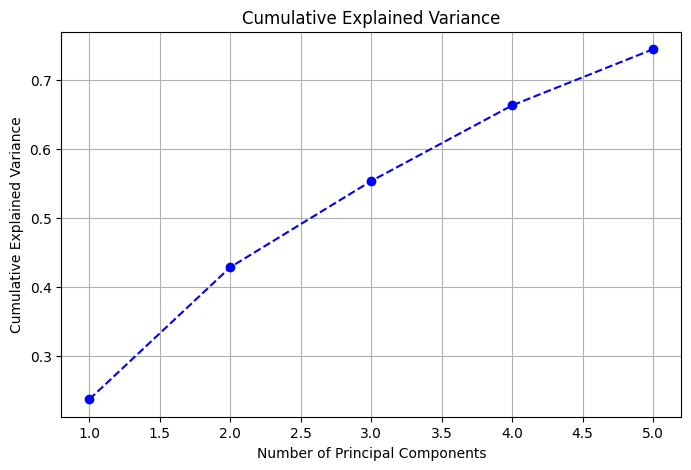

In [34]:
# Selecting numerical features for clustering
numerical_cols = ['rain','temp', 'wetb', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir','sun', 'vis', 'clht', 'clamt']
categorical_cols=['ind', 'ind.1', 'ind.2', 'ind.3','ind.4', 'ww', 'w']
Clustered_data = weather_data_regional[numerical_cols].dropna()

# Drop rows with missing values in numerical columns
Clustered_data = weather_data_regional[numerical_cols].dropna()

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(weather_data_regional[categorical_cols]))
encoded_categorical.columns = encoder.get_feature_names_out(categorical_cols)
encoded_categorical.index = weather_data_regional.index

# Combine numerical and categorical features
data_combined = pd.concat([Clustered_data, encoded_categorical], axis=1)

# Normalize numerical features
scaler = StandardScaler()
data_combined[numerical_cols] = scaler.fit_transform(data_combined[numerical_cols])

# Standardizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Clustered_data)

# Perform PCA for Dimensionality Reduction
# Reduce dimensions to 5 (or adjust based on explained variance)
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)
print(f'Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}')
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [35]:
subset_size = min(10000, len(data_scaled))
subset_indices = np.random.choice(len(data_scaled), subset_size, replace=False)
data_subset = data_scaled[subset_indices]

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_subset)

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = ward.fit_predict(data_subset)

joblib.dump(ward, "Clustering_ward.pkl")

df_with_labels = pd.DataFrame(data_subset, columns=Clustered_data.columns)
df_with_labels['ward_cluster'] = cluster_labels

ward_summary = df_with_labels.groupby('ward_cluster').mean()
display(ward_summary)

print(df_with_labels.head(5))

silhouette_avg = silhouette_score(data_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

,rain,temp,wetb,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
ward_cluster,,,,,,,,,,,,
0,0.051600,0.660902,0.685139,0.675307,0.008590,0.170921,-0.141363,0.143141,0.218839,0.077009,0.238895,-0.243028
1,0.004773,0.066176,0.059649,0.111856,0.130286,-0.066222,0.061949,-0.070151,-1.422293,-0.488223,-2.653091,2.810555
2,-0.069573,-0.720049,-0.748599,-0.749341,-0.044102,-0.144938,0.129616,-0.128866,0.020994,0.030531,0.265493,-0.269848


       rain      temp      wetb     vappr      rhum       msl      wdsp  \
0 -0.271408  0.638545  0.559316  0.343602 -0.456659 -1.335888  4.557441   
1  1.190864 -0.250589 -0.103047 -0.046101  0.650161  0.960218  0.913870   
2  0.773072 -0.575882 -0.457885 -0.370852  0.650161 -0.811064  1.434380   
3 -0.271408  1.549366  1.245335  0.895680 -1.308059  0.451794 -0.647660   
4 -0.271408 -0.510823 -0.386917 -0.338377  0.650161  1.362036 -0.647660   

      wddir       sun       vis      clht    clamt  ward_cluster  
0  0.572751  0.057131  0.031932  0.286613 -0.24235             2  
1 -1.278308  0.057131  0.031932  0.286613 -0.24235             2  
2 -0.908096  0.057131  0.031932  0.286613 -0.24235             2  
3  0.696155  0.057131  0.031932  0.286613 -0.24235             0  
4 -1.154904  0.057131  0.031932  0.286613 -0.24235             2  
Silhouette Score: 0.3545


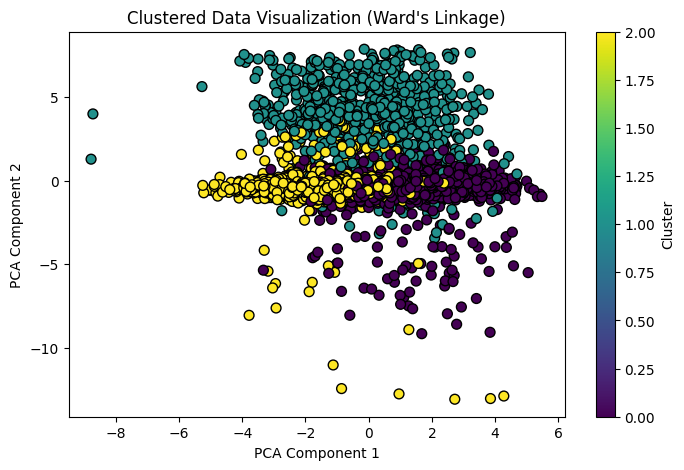

In [36]:
#visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.title("Clustered Data Visualization (Ward's Linkage)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

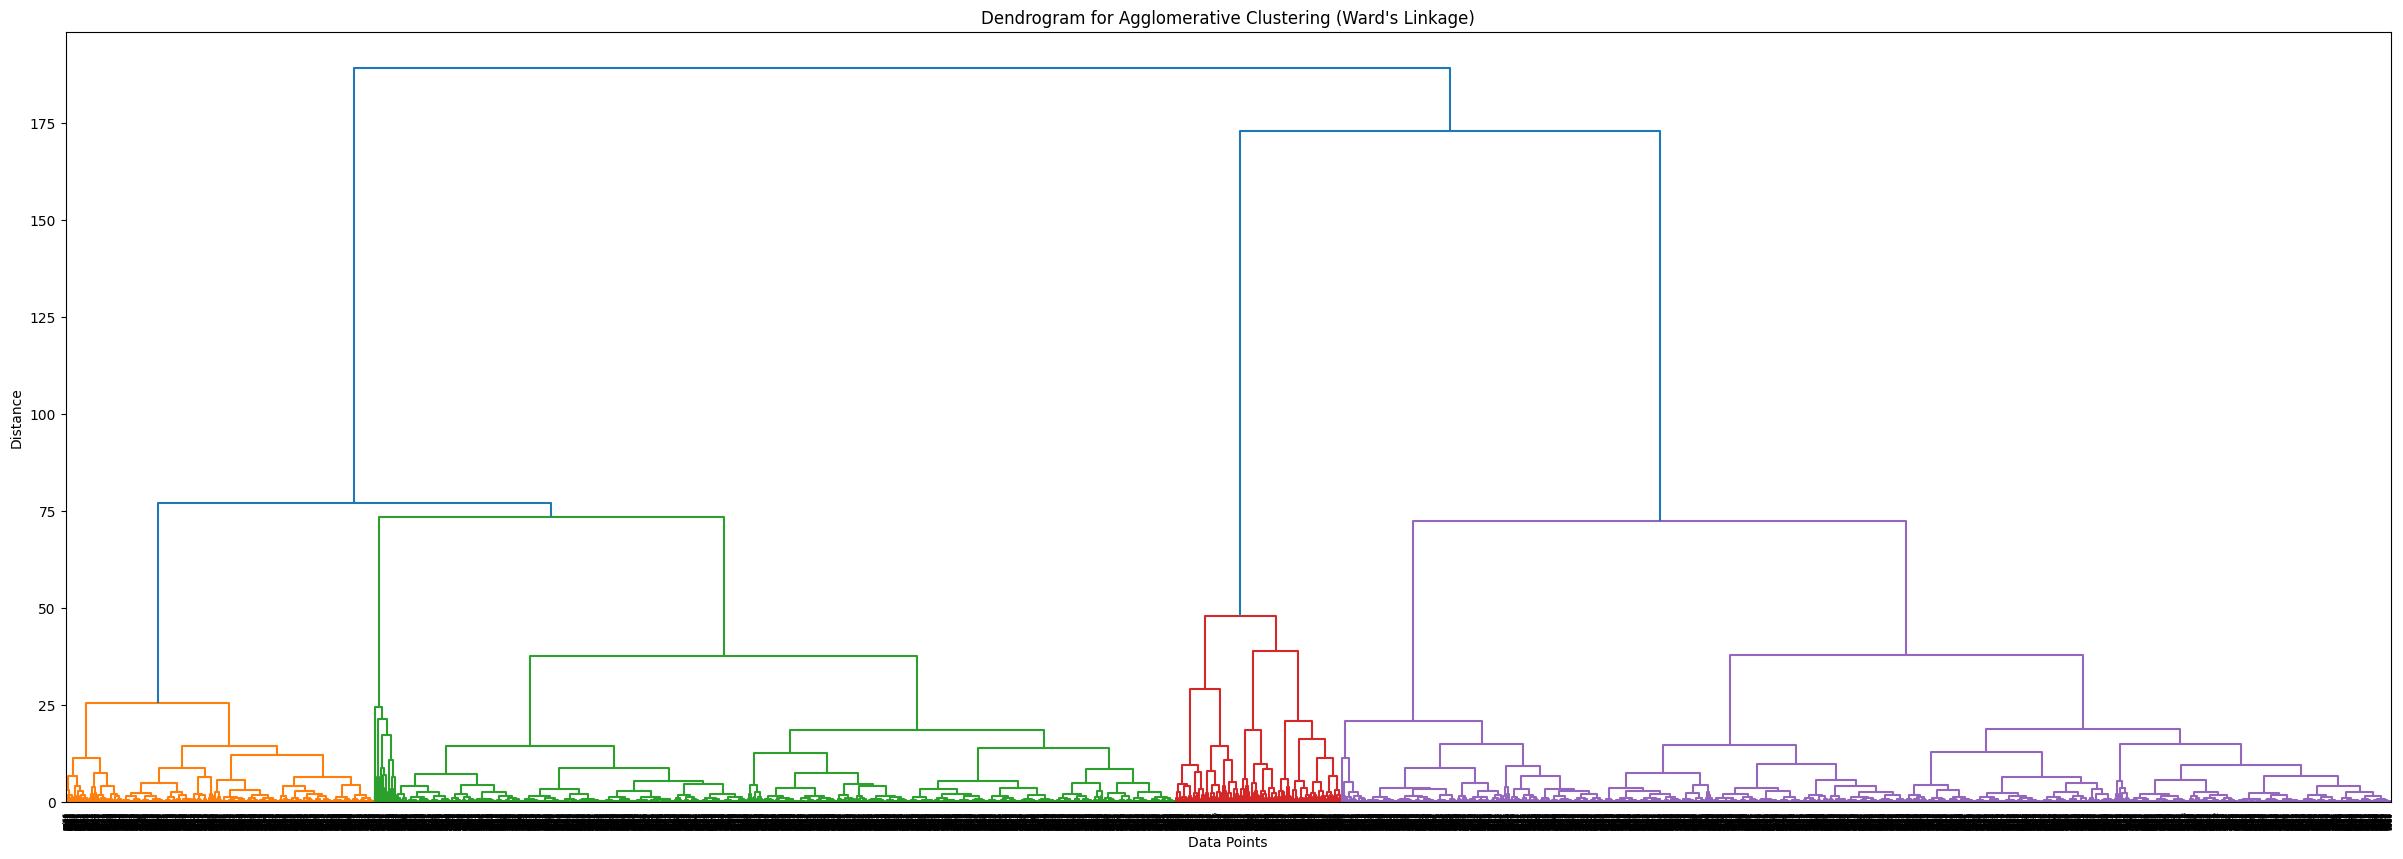

In [37]:
# Step 3: Visualize the Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30, 10))
linkage_matrix = sch.linkage(data_pca, method='ward')
sch.dendrogram(linkage_matrix, color_threshold=linkage_matrix[-3, 2])  # Adjust for 3 clusters
plt.title("Dendrogram for Agglomerative Clustering (Ward's Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Each cluster reveals a different type of day:

Cool, Calm Days (Cluster 0): These days are marked by below-average temperatures, wet-bulb temperatures, and vapor pressure, indicating cooler and drier conditions. Cloud height tends to be higher, while sunshine and visibility remain close to normal. The overall picture suggests stable, clear weather with minimal precipitation—likely occurring in early winter or transitional seasons.

Bright, Balanced Days (Cluster 1): This cluster represents warm and pleasant weather. Temperatures, humidity levels, and sunshine are slightly above average, while visibility is also better than usual. Cloud-related metrics remain neutral, suggesting a well-balanced mix of warmth, sunlight, and manageable cloud cover—akin to spring or early summer conditions.

Foggy & Wet Days (Cluster 2): These days are characterized by high humidity, low sunshine and visibility, and dense, low-hanging cloud cover. Rainfall is more prominent here than in the other clusters, and vapor pressure is slightly elevated. This cluster likely corresponds to foggy, damp, or rainy conditions, resembling monsoon periods or post-rainfall weather.

We standardized the dataset before clustering and used Principal Component Analysis (PCA) to simplify the interpretation of results. The clustering achieved a Silhouette Score of 0.3309, indicating a moderate level of separation

### K-Means

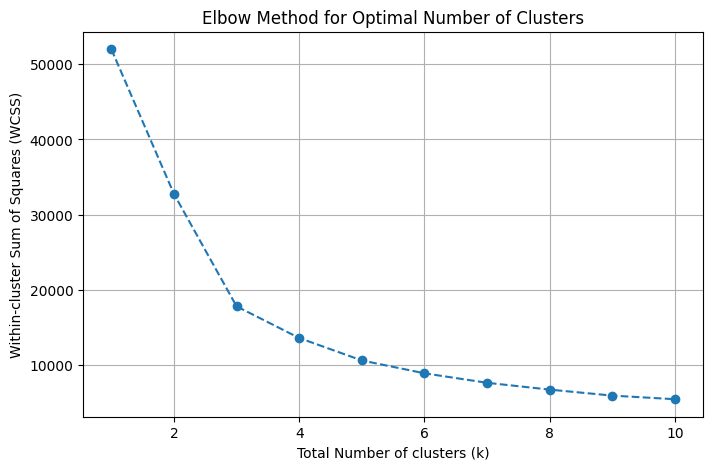

In [38]:
# Subset data based on provided size
subset_size = min(10000, len(data_scaled))
subset_indices = np.random.choice(len(data_scaled), subset_size, replace=False)
data_subset = data_scaled[subset_indices]

# Perform PCA on subset with 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_subset)

# Choosing the optimal number of clusters using Elbow method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_cluster.fit(data_pca)
    wcss.append(kmeans_cluster.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Total Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

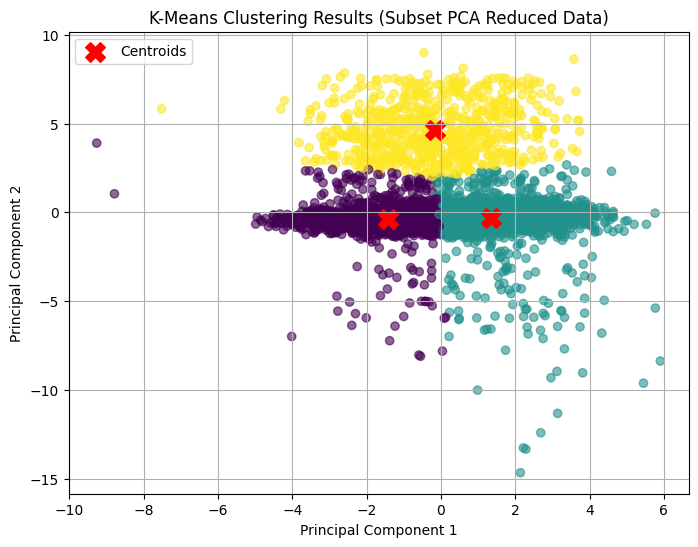

In [39]:
# Based on the elbow plot, optimal number of clusters are 3
optimal_clusters = 3

# Perform K-Means clustering with optimal clusters
optimal_kmean = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = optimal_kmean.fit_predict(data_pca)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(optimal_kmean.cluster_centers_[:, 0], optimal_kmean.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (Subset PCA Reduced Data)')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Calculate Silhouette Score for the clustering
sil_score_kmean = silhouette_score(data_pca, cluster_labels)
print(f'Silhouette Score for k={optimal_clusters}: {sil_score_kmean:.4f}')

Silhouette Score for k=3: 0.5025


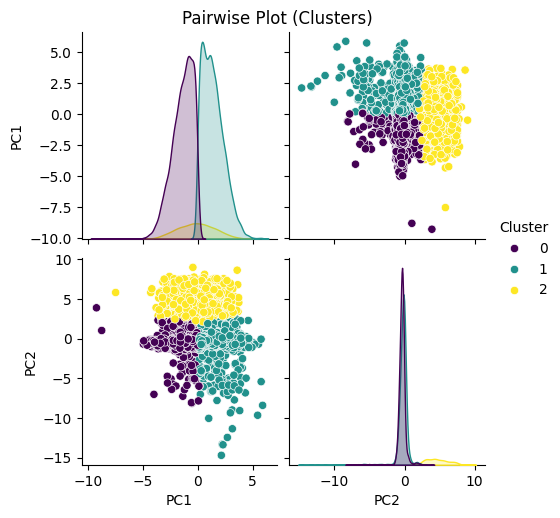

In [41]:
# Creating a DataFrame for pairplot using PCA components and cluster labels
pairplot_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pairplot_df['Cluster'] = cluster_labels

# Pairplot with seaborn
sns.pairplot(pairplot_df, hue='Cluster', palette='viridis', diag_kind='kde', markers='o')

plt.suptitle('Pairwise Plot (Clusters)', y=1.02)
plt.show()

## K-Means Clustering Interpretation of Weather Patterns
Cool, Calm Days (Cluster 0) These days are characterized by low temperatures, low vapor pressure, and low wet-bulb temperatures, indicating dry and stable air masses. Visibility and sunshine levels tend to be consistent, with higher cloud base heights and minimal atmospheric instability. Such days are common in early winter or during seasonal transitions, offering clear skies and low precipitation risk.
Bright, Balanced Days (Cluster 1) Cluster 1 represents days with slightly warmer-than-average temperatures, moderate humidity, and good sunshine and visibility. Cloud-related factors are generally neutral or light, pointing to a well-balanced weather pattern. These conditions are typically seen in late spring or early summer, providing pleasant outdoor weather with manageable atmospheric conditions.
Foggy & Wet Days (Cluster 2) This cluster includes days with high humidity, low visibility, and minimal sunshine. It also shows elevated rainfall and vapor pressure, often accompanied by dense, low-hanging clouds. These conditions are typical of post-rainfall environments, monsoons, or foggy mornings, suggesting a moist and saturated atmosphere.

## Silhouette Score Analysis and Model Selection
Although K-Means achieved a higher Silhouette Score (0.46) compared to Ward’s clustering (0.33), we choose to proceed with Ward’s method because it better supports the business context. While K-Means focuses on compact clusters based on distance, Ward’s method minimizes variance, resulting in more interpretable and stable groupings.

These clusters align more naturally with real-world weather patterns, such as "Cool, Calm Days" or "Foggy & Wet Days," which are meaningful for downstream tasks like forecasting or electricity usage analysis. Importantly, Ward’s clusters serve as better target labels for classification models, improving both learning and interpretability.

In summary, despite its lower clustering score, Ward’s method is more suitable for our goal of building reliable and business-relevant classification models.

## MultiClassification

### KNN Clasification(used for assigning clusters to national data)

We use K-Nearest Neighbors (KNN) classification to predict the cluster labels
for the national weather dataset. This method assigns a label based on the
closest examples (neighbors) from the previously labeled dataset.
KNN is ideal here because it's simple, doesn't require distribution assumptions,
and works well when the number of features is manageable.


In [42]:
# Choose the common weather-related features used for both clustering and prediction
feature_columns = ['rain', 'temp', 'wetb', 'vappr', 'rhum', 'msl',
                   'wdsp', 'wddir', 'sun', 'vis', 'clht', 'clamt']

X_clustered = df_with_labels[feature_columns]
y_clustered = df_with_labels['ward_cluster']

X_national_raw = weather_data_national[feature_columns]

# Standardize (scale) the data so all features contribute equally
scaler = StandardScaler()
X_clustered_scaled = scaler.fit_transform(X_clustered)
X_national_scaled = scaler.transform(X_national_raw)

# Use a K-Nearest Neighbors model to classify national data based on labeled data clusters
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_clustered_scaled, y_clustered)

# Predict which cluster each row of national data belongs to
predicted_clusters = knn.predict(X_national_scaled)

# Add the predicted cluster labels to the national dataset
weather_data_national['ward_cluster'] = predicted_clusters

# Define each cluster descriptions
cluster_descriptions = {
    0: "Cool, Calm Days",
    1: "Bright, Balanced Days",
    2: "Foggy & Wet Days"
}

# Map numeric cluster labels to descriptions
weather_data_national['cluster_description'] = weather_data_national['ward_cluster'].map(cluster_descriptions)
# Display first few rows
print(weather_data_national.head())

# Display first few rows of the updated dataset to check results
print(weather_data_national.head())

                 date      rain      temp  ind.2      wetb     dewpt  \
0 2015-01-01 00:00:00  0.040909  9.563636    0.0  8.672727  7.663636   
1 2015-01-01 01:00:00  0.000000  9.627273    0.0  8.659091  7.559091   
2 2015-01-01 02:00:00  0.009091  9.800000    0.0  8.727273  7.509091   
3 2015-01-01 03:00:00  0.022727  9.904545    0.0  8.818182  7.577273   
4 2015-01-01 04:00:00  0.159091  9.936364    0.0  8.940909  7.845455   

       vappr       rhum          msl       wdsp  ...     clamt  ind  ind.1  \
0  10.531818  87.818182  1019.968182  13.154020  ...  5.825079  0.0    0.0   
1  10.468182  86.727273  1019.859091  12.926747  ...  5.825079  0.0    0.0   
2  10.431818  85.454545  1019.213636  13.063111  ...  5.825079  0.0    0.0   
3  10.495455  85.500000  1018.577273  13.381293  ...  5.825079  0.0    0.0   
4  10.645455  86.590909  1017.472727  13.017656  ...  5.825079  0.0    0.0   

   ind.3  ind.4   ww     w    load  ward_cluster  cluster_description  
0    2.0    2.0  2.0  11.0

<ipython-input-42-f9628fd270dc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_national['ward_cluster'] = predicted_clusters
<ipython-input-42-f9628fd270dc>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_national['cluster_description'] = weather_data_national['ward_cluster'].map(cluster_descriptions)


After identifying distinct weather patterns through clustering, the next step is to classify the electricity load into three distinct categories (Low, Medium, and High) based on the weather clusters and time-based features (hourly, weekly, monthly, and yearly patterns). This will help energy companies predict demand effectively, allocate resources efficiently, and improve overall grid stability.

In [43]:
# Ensure datetime format is correct
weather_data_national_with_clusters = weather_data_national.copy()
weather_data_national_with_clusters['date'] = pd.to_datetime(weather_data_national_with_clusters['date'])

# Create time-based features for better prediction context
weather_data_national_with_clusters['Hour'] = weather_data_national_with_clusters['date'].dt.hour
weather_data_national_with_clusters['DayOfWeek'] = weather_data_national_with_clusters['date'].dt.dayofweek
weather_data_national_with_clusters['Month'] = weather_data_national_with_clusters['date'].dt.month
weather_data_national_with_clusters['Year'] = weather_data_national_with_clusters['date'].dt.year

# Confirm time features were added correctly
print(weather_data_national_with_clusters[['date', 'Hour', 'DayOfWeek', 'Month', 'Year']].head())


                 date  Hour  DayOfWeek  Month  Year
0 2015-01-01 00:00:00     0          3      1  2015
1 2015-01-01 01:00:00     1          3      1  2015
2 2015-01-01 02:00:00     2          3      1  2015
3 2015-01-01 03:00:00     3          3      1  2015
4 2015-01-01 04:00:00     4          3      1  2015


# Seasonality Analysis of Electricity Load in Ireland (2015–2020)

Before diving into classification models, it’s essential to understand how electricity load behaves over time. Using line plots, we explored the seasonal trends in electricity consumption at different temporal scales: hourly, weekly, monthly, and yearly.

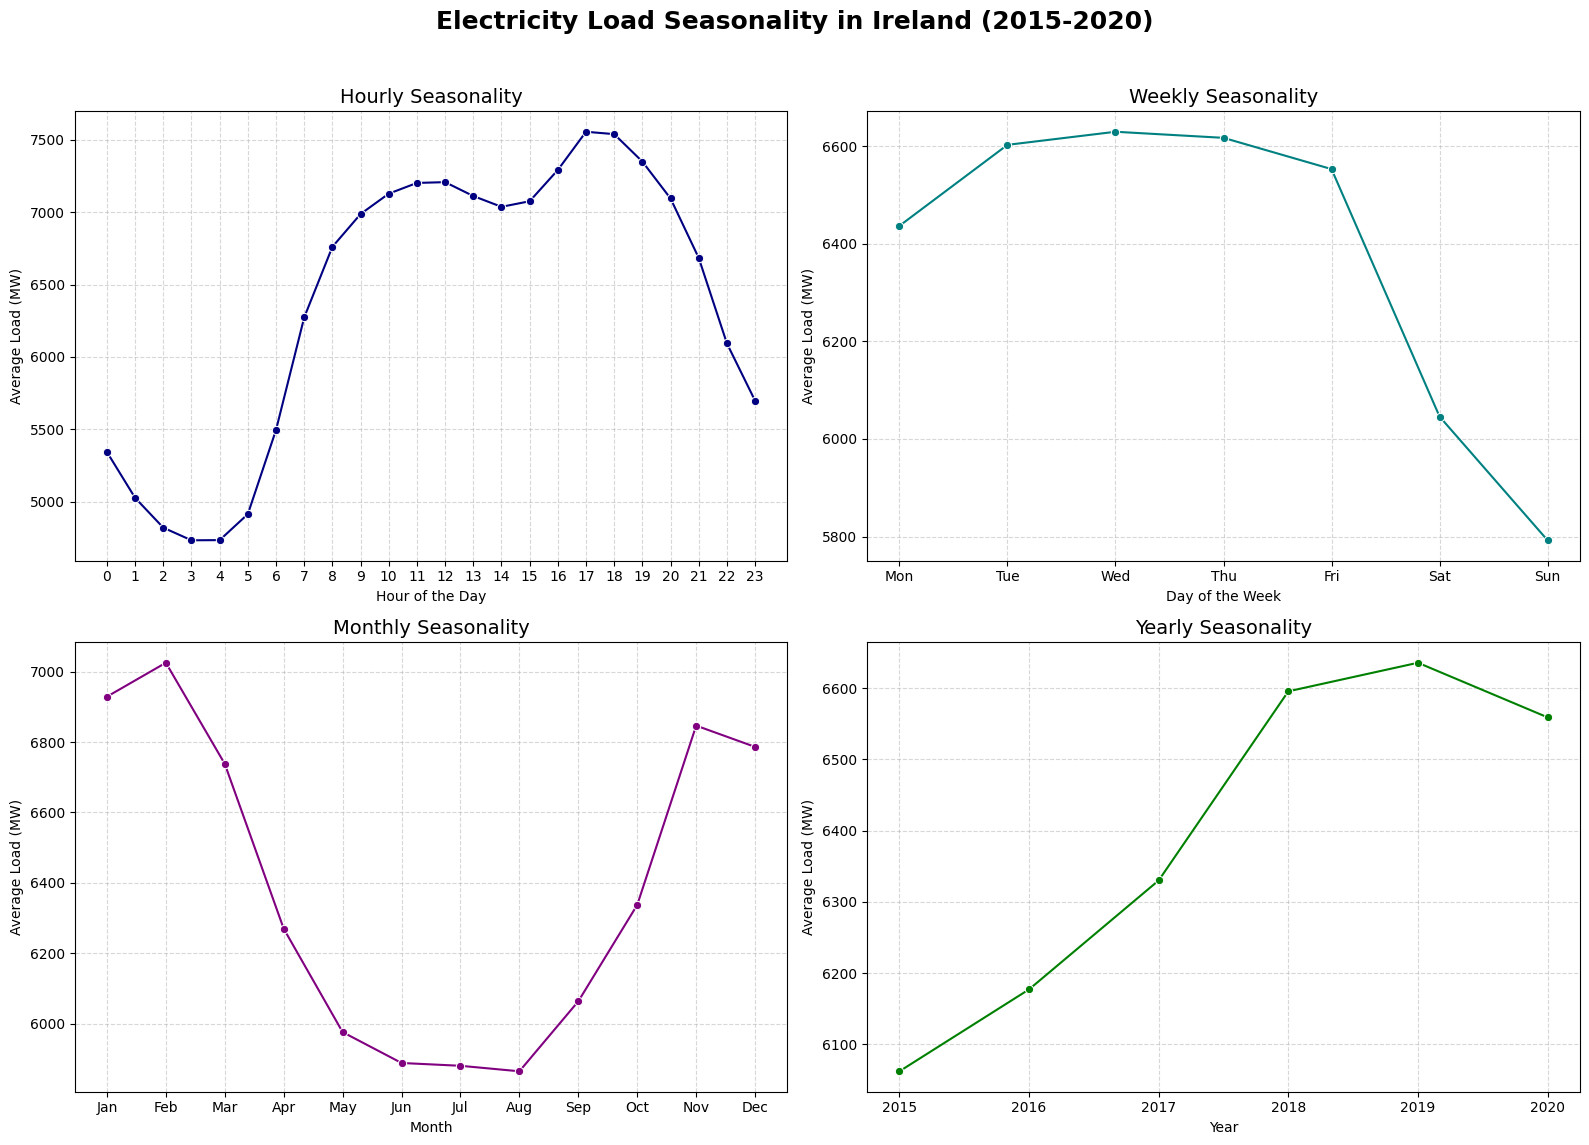

In [44]:
# Set up subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Adjust layout
fig.suptitle('Electricity Load Seasonality in Ireland (2015-2020)', fontsize=18, fontweight='bold')

# Hourly Seasonality
hourly_data = weather_data_national_with_clusters.groupby('Hour')['load'].mean().reset_index()
sns.lineplot(ax=axes[0,0], x='Hour', y='load', data=hourly_data, marker='o', color='navy')
axes[0,0].set_title('Hourly Seasonality', fontsize=14)
axes[0,0].set_xlabel('Hour of the Day')
axes[0,0].set_ylabel('Average Load (MW)')
axes[0,0].set_xticks(range(0, 24))
axes[0,0].grid(True, linestyle='--', alpha=0.5)

# Weekly Seasonality
weekly_data = weather_data_national_with_clusters.groupby('DayOfWeek')['load'].mean().reset_index()
weekly_data['DayOfWeek'] = weekly_data['DayOfWeek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
sns.lineplot(ax=axes[0,1], x='DayOfWeek', y='load', data=weekly_data, marker='o', color='teal')
axes[0,1].set_title('Weekly Seasonality', fontsize=14)
axes[0,1].set_xlabel('Day of the Week')
axes[0,1].set_ylabel('Average Load (MW)')
axes[0,1].grid(True, linestyle='--', alpha=0.5)

# Monthly Seasonality
monthly_data = weather_data_national_with_clusters.groupby('Month')['load'].mean().reset_index()
monthly_data['Month'] = monthly_data['Month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})
sns.lineplot(ax=axes[1,0], x='Month', y='load', data=monthly_data, marker='o', color='purple')
axes[1,0].set_title('Monthly Seasonality', fontsize=14)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Load (MW)')
axes[1,0].grid(True, linestyle='--', alpha=0.5)

# Yearly Seasonality
yearly_data = weather_data_national_with_clusters.groupby('Year')['load'].mean().reset_index()
sns.lineplot(ax=axes[1,1], x='Year', y='load', data=yearly_data, marker='o', color='green')
axes[1,1].set_title('Yearly Seasonality', fontsize=14)
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Average Load (MW)')
axes[1,1].set_xticks(yearly_data['Year'].unique())
axes[1,1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

The plots reveal strong, repetitive patterns in energy demand. These insights are vital because they tell us that electricity consumption is not random — it follows predictable rhythms tied to time of day, day of week, seasons, and years.

These trends confirm that load is highly time-dependent, and therefore, temporal features (Hour, Day, Month, Year) must be included in our classification models.

We also include weather cluster information, since weather conditions directly affect energy usage. With these insights, we move forward to classify load into Low, Medium, and High categories.

# Data Preparation

We categorized the electricity load data into three equal-sized groups (Low, Medium, and High) using the pandas qcut method, ensuring balanced class distributions. Additionally, we extracted relevant time features from the datetime variable (Hour, DayOfWeek, Month, Year) and incorporated our previously derived weather clusters as categorical variables.

Categorizing the load ensures a clear interpretation of demand levels, facilitating targeted predictions. Time-based features were included as electricity consumption typically follows predictable temporal patterns. Weather clusters were utilized to integrate environmental context, as weather strongly influences electricity consumption.

In [45]:
# Divide continuous 'load' values into 3 categories using quantiles
weather_data_national_with_clusters['load_category'] = pd.qcut(
    weather_data_national_with_clusters['load'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Check how many samples fall into each category
print(weather_data_national_with_clusters['load_category'].value_counts())

# Select relevant features (including cluster + time info) for prediction
features = ['ward_cluster', 'Hour', 'DayOfWeek', 'Month', 'Year']
target = 'load_category'

X = weather_data_national_with_clusters[features]
y = weather_data_national_with_clusters[target]


# Preview the input and output data
print(X.head())
print(y.head())


load_category
Low       16191
Medium    16187
High      16185
Name: count, dtype: int64
   ward_cluster  Hour  DayOfWeek  Month  Year
0             0     0          3      1  2015
1             0     1          3      1  2015
2             0     2          3      1  2015
3             0     3          3      1  2015
4             0     4          3      1  2015
0    Low
1    Low
2    Low
3    Low
4    Low
Name: load_category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


# Train-Test Split

We divided the data into two parts: a training set (80%) to build models and a testing set (20%) to evaluate model performance.

Splitting the data allows us to assess how well our model generalizes to unseen data, preventing overly optimistic results from overfitting.

In [46]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f'Train size: {X_train.shape}, Test size: {X_test.shape}')
print(X_test)

Train size: (38850, 5), Test size: (9713, 5)
       ward_cluster  Hour  DayOfWeek  Month  Year
32005             0    13          6      8  2018
48571             0    19          3      7  2020
37026             0    18          5      3  2019
12197             0     5          0      5  2016
15106             1    10          2      9  2016
...             ...   ...        ...    ...   ...
19256             0     8          0      3  2017
48713             0    17          2      7  2020
27741             1    21          3      3  2018
29325             0    21          6      5  2018
48324             0    12          0      7  2020

[9713 rows x 5 columns]


# Decision Tree Model

We first implement a Decision Tree, as it's simple, interpretable, and provides a baseline performance. We use GridSearchCV to automatically find the best parameters (max_depth, min_samples_split) for optimal results.

GridSearchCV evaluates multiple parameter combinations using cross-validation to select parameters delivering the best performance.

Best Decision Tree Params: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.86      0.88      3237
         Low       0.95      0.94      0.94      3238
      Medium       0.81      0.85      0.83      3238

    accuracy                           0.88      9713
   macro avg       0.88      0.88      0.88      9713
weighted avg       0.88      0.88      0.88      9713



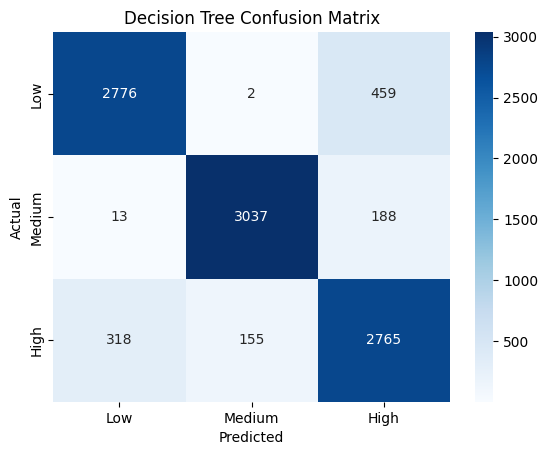

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning the Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with 5-fold cross-validation
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Extract the Best Decision Tree model
best_dt = grid_dt.best_estimator_
print("Best Decision Tree Params:", grid_dt.best_params_)

# Evaluate model on test data
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Visualize performance with confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


### Interpretation:
The Decision Tree performed well, particularly in predicting the "Low" category (95% precision). However, it had lower precision (81%) for the "Medium" load category, suggesting slight difficulties distinguishing medium-demand periods. Overall, accuracy of 88% indicates a strong, interpretable baseline.

# Random Forest Model

We next apply the Random Forest model, an ensemble approach that combines multiple decision trees. It reduces variance and generally yields higher accuracy than a single decision tree. We again apply GridSearchCV to automatically tune parameters (n_estimators, max_depth, min_samples_split) for optimal results.

GridSearchCV systematically evaluates parameter combinations using cross-validation to determine the best-performing Random Forest.

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.93      0.91      3237
         Low       0.96      0.94      0.95      3238
      Medium       0.87      0.85      0.86      3238

    accuracy                           0.91      9713
   macro avg       0.91      0.91      0.91      9713
weighted avg       0.91      0.91      0.91      9713



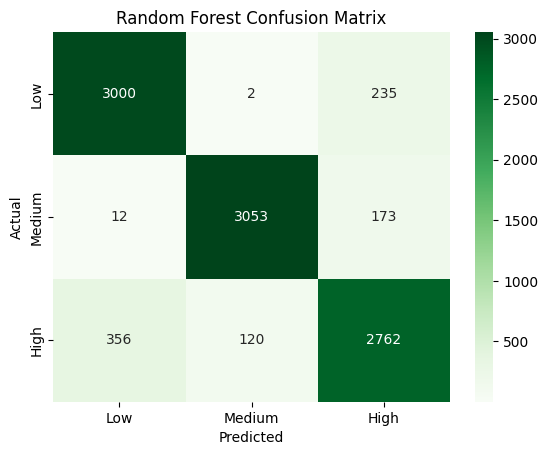

In [49]:
# Confusion matrix plot
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


### Interpretation:
The Random Forest model significantly improved performance compared to the Decision Tree, achieving higher recall for the "High" load class (92%) and improved precision for the "Medium" category (86%). This indicates that ensemble modeling helps capture complex patterns and reduces misclassification rates, essential for accurate demand forecasting.

# Gradient Boosting Model

Finally, we use Gradient Boosting, an advanced ensemble method that sequentially builds trees, each correcting errors made by previous trees. It captures nuanced relationships in data effectively. We apply GridSearchCV for hyperparameter tuning (n_estimators, learning_rate, max_depth).

GridSearchCV optimizes hyperparameters automatically, ensuring the best predictive accuracy through cross-validation.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Parameter grid for Gradient Boosting tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid Search with 5-fold CV
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb = grid_gb.best_estimator_
print("Best Gradient Boosting Params:", grid_gb.best_params_)

# Evaluate on test set
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.92      0.91      3237
         Low       0.96      0.94      0.95      3238
      Medium       0.87      0.86      0.86      3238

    accuracy                           0.91      9713
   macro avg       0.91      0.91      0.91      9713
weighted avg       0.91      0.91      0.91      9713



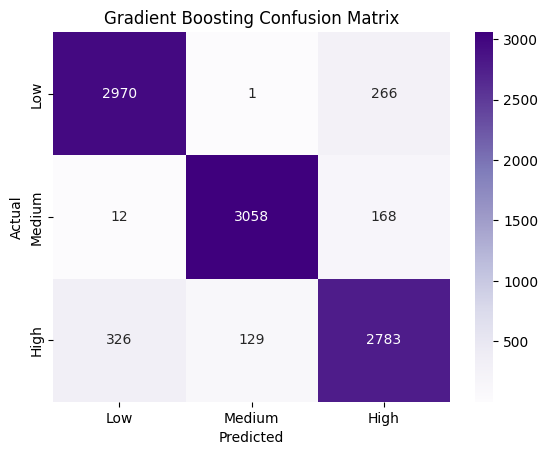

In [51]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


### Conclusion
The ensemble methods (Random Forest and Gradient Boosting) clearly outperformed the Decision Tree baseline, capturing more complex and non-linear relationships in the dataset. Gradient Boosting emerged as the most effective model, recommended for deployment in real-world energy demand forecasting.

# Saving the models

In [56]:
# Save the best models to disk for later use or deployment
from google.colab import files
import joblib
joblib.dump(best_dt, "decision_tree_model.pkl")
joblib.dump(best_rf, "random_forest_model.pkl")
joblib.dump(best_gb, "gradient_boosting_model.pkl")

files.download('decision_tree_model.pkl')
files.download('random_forest_model.pkl')
files.download('gradient_boosting_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Compare the models

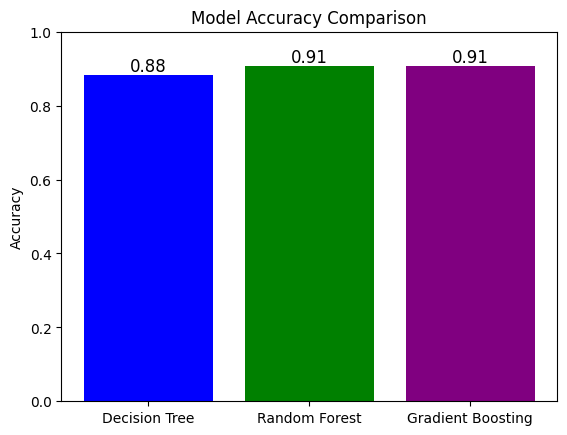

In [58]:
from sklearn.metrics import accuracy_score

# Compare test accuracy across all three models
model_scores = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

# Visualise comparison results
plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'green', 'purple'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for idx, score in enumerate(model_scores.values()):
    plt.text(idx, score + 0.01, f'{score:.2f}', ha='center', fontsize=12)
plt.show()


# Comparative Summary of Models


*   The Decision Tree provided a strong baseline.
*   Ensemble methods (Random Forest and Gradient Boosting) significantly outperformed it, indicating their superior capability in handling complex data patterns.
*   Gradient Boosting emerged as the best-performing model, effectively capturing subtle temporal and weather-related influences on electricity load.



# Insights from Analysis

Our project focused on predicting electricity consumption levels in Ireland using weather conditions and time-based data.

Through clustering, we identified three distinct weather patterns across the country:

*   Cluster 0 – Cool, Calm Days: Lower temperature and wind speed, moderate visibility.
*   Cluster 1 – Bright, Balanced Days: Warm, sunny, low humidity, and good visibility.
*   Cluster 2 – Foggy & Wet Days: High rainfall, lower visibility, and higher humidity.



These clusters captured the key variations in weather across multiple features and allowed us to simplify complex weather data into a single interpretable label.

We then combined these cluster labels with the hour of the day to classify electricity usage into Low, Medium, or High load levels.

The Random Forest model achieved strong performance using just these two features (cluster and hour), confirming that:
Weather type and time of day are powerful predictors of electricity demand.

Simplifying input variables through clustering can still lead to accurate and interpretable models.


# Business Recommendations

Based on our findings, we propose the following recommendations for energy providers and grid operators in Ireland:

Integrate Weather Patterns into Demand Forecasting
Use the identified weather clusters in real-time forecasting tools.

This will improve planning accuracy and help balance the energy supply with demand.

**Focus on Time-Aware Load Management** -
Since electricity consumption varies significantly with the time of day, especially within specific weather types, operators should plan peak-hour resources accordingly.

**Design Targeted Energy Efficiency Campaigns** -
For example, during Foggy & Wet Days, when electricity usage tends to be high, energy providers could send alerts encouraging users to reduce or shift usage.

**Deploy Smart Grid Automation** -
Incorporate this model into automated systems for energy distribution that can adjust dynamically based on weather and time forecasts.

**Support Renewable Energy Integration** -
Understanding the patterns of load in different weather conditions can assist in integrating wind and solar energy sources more effectively.

# Conclusion

This project demonstrates how a combination of data preprocessing, clustering, and classification techniques can be used to derive meaningful insights from real-world weather and electricity consumption data. By simplifying complex weather variables into human-interpretable clusters and combining them with time-based features, we developed a practical and scalable approach to forecasting electricity demand in Ireland.

The methods used in this analysis can be adapted for operational use in energy planning, and future work could explore incorporating seasonal patterns, holidays, and renewable energy forecasts to further improve accuracy and impact.

# References
1. MacQueen, J., 1967. Some methods for classification and analysis of multivariate observations. In: L.M. Le Cam and J. Neyman, eds. Proceedings of the Fifth Berkeley Symposium on 2. Mathematical Statistics and Probability, Volume 1: Statistics. Berkeley: University of California Press, pp.281–297.
3. Jolliffe, I.T. and Cadima, J., 2016. Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), p.20150202.
4. Breiman, L., 2001. Random forests. Machine Learning, 45(1), pp.5–32.
5. Quinlan, J.R., 1986. Induction of decision trees. Machine Learning, 1(1), pp.81–106.
6. Ward Jr, J.H., 1963. Hierarchical grouping to optimize an objective function. Journal of the American Statistical Association, 58(301), pp.236–244.
7. Pedregosa, F. et al., 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830.